In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

mnist = keras.datasets.mnist
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()

c:\users\rahee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\rahee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\rahee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\rahee\appd

11493376/11490434 [==============================] - 17s 2us/step


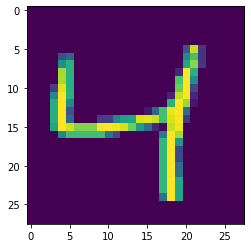

In [2]:
plt.imshow(x_train_full[2])

In [3]:
x_train_norm = x_train_full/255.
x_test_norm = x_test/255.

x_valid, x_train = x_train_norm[:5000], x_train_norm[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test_norm

In [4]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [7]:
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 85us/sample - loss: 0.5955 - acc: 0.8491 - val_loss: 0.3055 - val_acc: 0.9136
Epoch 2/30
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2889 - acc: 0.9169 - val_loss: 0.2392 - val_acc: 0.9332
Epoch 3/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.2378 - acc: 0.9324 - val_loss: 0.2002 - val_acc: 0.9434
Epoch 4/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.2040 - acc: 0.9411 - val_loss: 0.1745 - val_acc: 0.9520
Epoch 5/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.1786 - acc: 0.9494 - val_loss: 0.1575 - val_acc: 0.9566
Epoch 6/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.1577 - acc: 0.9546 - val_loss: 0.1421 - val_acc: 0.9620
Epoch 7/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.1413 - acc: 0.9604 - val_loss: 0.1

In [8]:
model.evaluate(x_valid,y_valid)

5000/5000 [==============================] - 0s 49us/sample - loss: 0.0656 - acc: 0.9810


[0.06562727889679372, 0.981]

In [9]:
x_sample = x_test[:5]
y_probability = model.predict(x_sample)

In [10]:
y_predict = model.predict_classes(x_sample)